# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()

X = iris.data[:, :2]
y = iris.target

mask = (y != 2)
X = X[mask]
y = y[mask]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

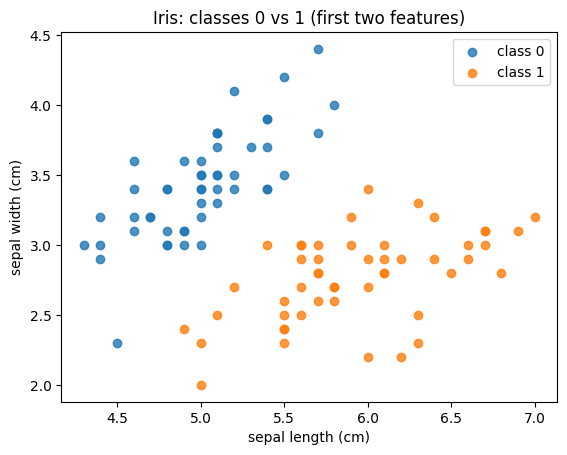

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], label="class 0", alpha=0.8)
plt.scatter(X[y==1, 0], X[y==1, 1], label="class 1", alpha=0.8)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris: classes 0 vs 1 (first two features)")
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

C_val = 200
SVMmodel = SVC(kernel='linear', C=C_val)
SVMmodel.fit(X_train, y_train)

print("Accuracy:", SVMmodel.score(X_test, y_test))

Accuracy: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

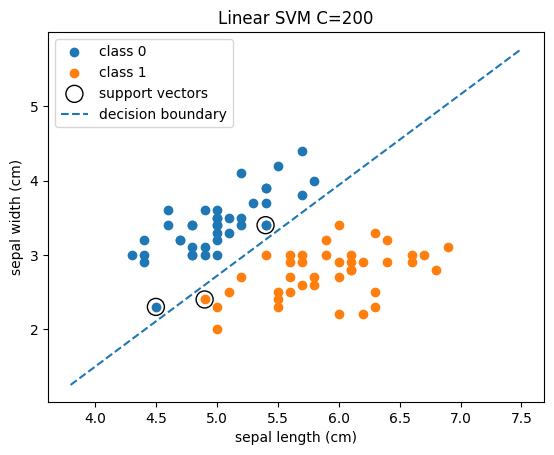

In [ ]:
supvectors = SVMmodel.support_vectors_

W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

plt.figure()
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label="class 0")
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label="class 1")
plt.scatter(supvectors[:, 0], supvectors[:, 1],
            s=150, facecolors='none', edgecolors='k', label="support vectors")

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
xs = np.linspace(x_min, x_max, 300)

if abs(W[1]) < 1e-12:
    x_vert = -b / W[0]
    plt.axvline(x_vert, linestyle='--', label="decision boundary")
else:
    ys = -(W[0]*xs + b) / W[1]
    plt.plot(xs, ys, linestyle='--', label="decision boundary")

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Linear SVM C={C_val}")
plt.legend()
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

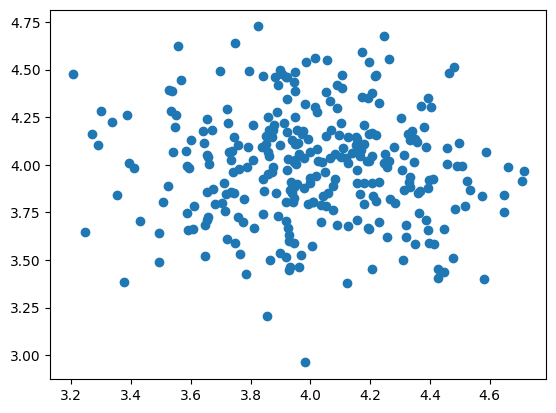

In [3]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

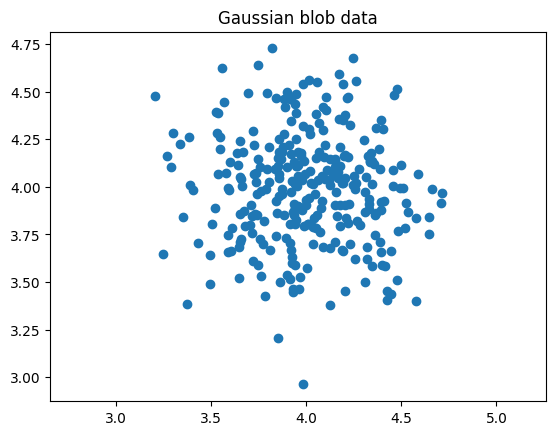

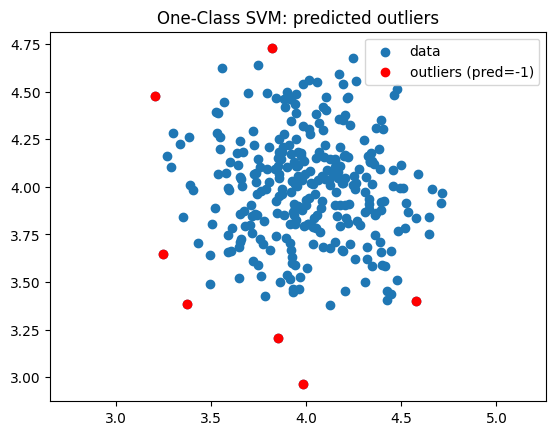

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.figure()
plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
plt.title("Gaussian blob data")
plt.show()

SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

pred = SVMmodelOne.predict(x)
anom_index = where(pred == -1)
values = x[anom_index]

plt.figure()
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(values[:,0], values[:,1], color='red', label="outliers (pred=-1)")
plt.axis('equal')
plt.title("One-Class SVM: predicted outliers")
plt.legend()
plt.show()

Plot the support vectors:

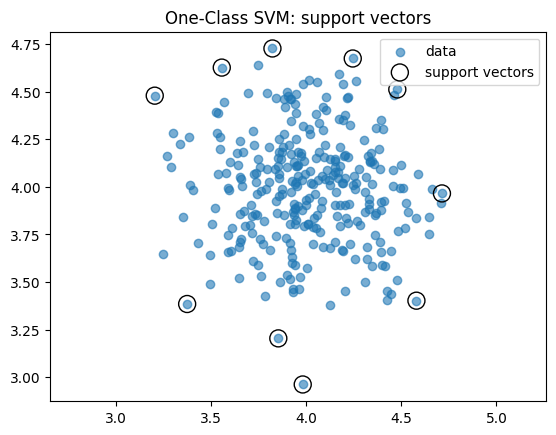

In [7]:
sv = SVMmodelOne.support_vectors_

plt.figure()
plt.scatter(x[:,0], x[:,1], alpha=0.6, label="data")
plt.scatter(sv[:,0], sv[:,1], s=150, facecolors='none', edgecolors='k', label="support vectors")
plt.axis('equal')
plt.title("One-Class SVM: support vectors")
plt.legend()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

Quantile threshold: 8.989098620408397


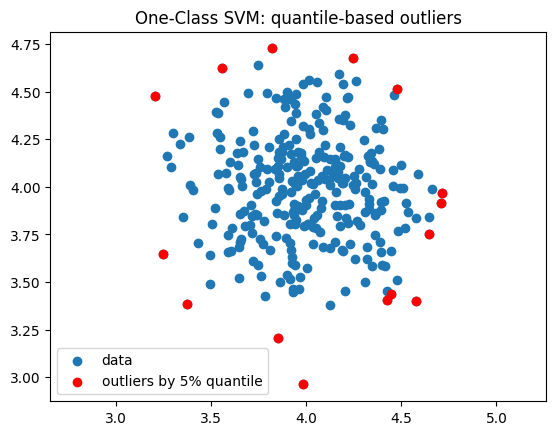

In [8]:
from numpy import quantile, where

scores = SVMmodelOne.score_samples(x)

q = 0.05
thresh = quantile(scores, q)

index = where(scores <= thresh)
values_q = x[index]

print("Quantile threshold:", thresh)

plt.figure()
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(values_q[:,0], values_q[:,1], color='red', label=f"outliers by {int(q*100)}% quantile")
plt.axis('equal')
plt.title("One-Class SVM: quantile-based outliers")
plt.legend()
plt.show()